In [1]:
import pandas as pd# importing the dataset 
df_train = pd.read_csv('train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val = pd.read_csv('val.txt',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


c:\Users\deepa\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

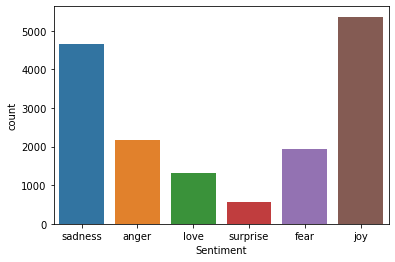

In [2]:
import seaborn as sns
import matplotlib 
sns.countplot(df_train.Sentiment)


In [18]:
!pip install text_hammer 


You should consider upgrading via the 'C:\Users\deepa\anaconda3\envs\ML\python.exe -m pip install --upgrade pip' command.


In [21]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
     ---------------------------------------- 12.8/12.8 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'c:\Users\deepa\anaconda3\envs\ML\python.exe -m pip install --upgrade pip' command.


In [3]:
import text_hammer as th

In [4]:
%%time
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

Wall time: 3 ms


In [5]:
def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

In [6]:
df_cleaned_train = text_preprocessing(df_train, 'Input')

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

In [7]:
print(df_cleaned_train)

                                                   Input Sentiment
0                                I do not feel humiliate   sadness
1      I can go from feel so hopeless to so damn hope...   sadness
2          I m grab a minute to post I feel greedy wrong     anger
3      I am ever feel nostalgic about the fireplace I...      love
4                                      I am feel grouchy     anger
...                                                  ...       ...
15995  I just have a very brief time in the beanbag a...   sadness
15996  I am now turn and I feel pathetic that I am st...   sadness
15997                     I feel strong and good overall       joy
15998  I feel like this was such a rude comment and I...     anger
15999  I know a lot but I feel so stupid because I ca...   sadness

[16000 rows x 2 columns]


In [8]:
df_cleaned_train['Sentiment'] = df_cleaned_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_test['Sentiment'] = df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_val['Sentiment'] = df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(df_cleaned_train.Sentiment.values)
y_test = to_categorical(df_test.Sentiment.values)
y_val = to_categorical(df_val.Sentiment.values)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
# from keras.preprocessing.text import Tokenizernum_words# this means 10000 unique words can be taken 
tokenizer=Tokenizer(num_words=10000,lower=True)
df_total = pd.concat([df_cleaned_train['Input'], df_test.Input], axis = 0)
tokenizer.fit_on_texts(df_total)


In [11]:
import pickle

with open("token.pkl",'wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
tokenizer
df_total[1]

1    I can go from feel so hopeless to so damn hope...
1            im updating my blog because i feel shitty
Name: Input, dtype: object

In [13]:
from keras_preprocessing.sequence import pad_sequences


In [14]:
X_train=tokenizer.texts_to_sequences(df_cleaned_train['Input']) # this converts texts into some numeric sequences 
X_train_pad=pad_sequences(X_train,maxlen=300,padding='post') # this makes the length of all numeric sequences equal 
X_test = tokenizer.texts_to_sequences(df_test.Input)
X_test_pad = pad_sequences(X_test, maxlen = 300, padding = 'post')
X_val = tokenizer.texts_to_sequences(df_val.Input)
X_val_pad = pad_sequences(X_val, maxlen = 300, padding = 'post')

In [15]:
X_train

[[1, 18, 12, 2, 773],
 [1,
  34,
  43,
  65,
  2,
  17,
  496,
  4,
  17,
  774,
  507,
  31,
  65,
  67,
  127,
  144,
  75,
  187,
  3,
  15,
  1215],
 [1, 16, 1445, 6, 517, 4, 192, 1, 2, 443, 279],
 [1, 23, 164, 2, 649, 25, 5, 3927, 1, 60, 44, 7, 13, 15, 76, 29, 5, 3349],
 [1, 23, 2, 1042],
 [7, 15, 52, 2, 6, 63, 2691, 329, 20, 12, 152, 162, 7, 20],
 [7,
  15,
  52,
  101,
  36,
  6753,
  36,
  45,
  1507,
  828,
  3,
  7,
  15,
  418,
  1359,
  6,
  138,
  1043,
  21,
  1,
  116,
  2,
  14,
  17,
  436],
 [1, 2, 30, 606, 25, 77, 30, 6, 1360, 36, 30, 1003, 30, 6, 123, 231, 273],
 [1,
  10,
  52,
  24,
  4835,
  19,
  123,
  1,
  2,
  7,
  4835,
  10,
  1629,
  90,
  3,
  41,
  6,
  978,
  2955],
 [1, 2, 638, 96],
 [1, 2, 14, 1, 10, 4, 41, 5, 1264, 1, 16, 89, 212, 86],
 [1,
  18,
  2,
  7,
  214,
  15,
  6,
  497,
  288,
  3,
  7,
  1,
  34,
  498,
  4,
  10,
  74,
  536,
  8,
  1790,
  2011],
 [1, 56, 13, 61, 5, 598, 45, 8, 123, 4, 2, 599],
 [1, 2, 332, 434, 1, 16, 31, 3928],
 [1,
 

In [53]:
!pip install gensim

     ---------------------------------------- 24.0/24.0 MB 6.6 MB/s eta 0:00:00
  Using cached Cython-0.29.28-py2.py3-none-any.whl (983 kB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.27
    Uninstalling Cython-0.29.27:
      Successfully uninstalled Cython-0.29.27


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.
fbprophet 0.7.1 requires setuptools-git>=1.2, which is not installed.
You should consider upgrading via the 'C:\Users\deepa\anaconda3\envs\ML\python.exe -m pip install --upgrade pip' command.


In [16]:

import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

In [17]:
import numpy as np

vector_size = 100
gensim_weight_matrix = np.zeros((10000,vector_size))
gensim_weight_matrix.shape

(10000, 100)

In [62]:
!pip install -U octis

     ------------------------------------ 129.8/129.8 KB 854.2 kB/s eta 0:00:00
     ---------------------------------------- 86.0/86.0 KB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 5.7/5.7 MB 3.7 MB/s eta 0:00:00
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
     -------------------------------------- 170.6/170.6 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 100.3/100.3 KB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 5.1 MB/s eta 0:00:00
     -------------------------------------- 120.7/120.7 KB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 5.4 MB/s eta 0:00:00
  Created wheel 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\deepa\\anaconda3\\envs\\ML\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\deepa\anaconda3\envs\ML\python.exe -m pip install --upgrade pip' command.


In [18]:
for word, index in tokenizer.word_index.items():
    if index < 10000: # since index starts with zero 
        if word in glove_gensim:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [19]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Dropout

In [20]:
EMBEDDING_DIM = 100
class_num = 6
model = Sequential()
model.add(Embedding(input_dim = 10000,
 output_dim = EMBEDDING_DIM,
 input_length= X_train_pad.shape[1],
 weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(class_num, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [21]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [22]:
history_embedding = model.fit(X_train_pad, y_train, 
                                epochs = 25, batch_size = 120, 
                                validation_data=(X_val_pad, y_val),
                                verbose = 1, callbacks= [es, mc]  )

Epoch 1/25
134/134 [==============================] - ETA: 0s - loss: 1.4170 - accuracy: 0.4559
Epoch 1: val_accuracy improved from -inf to 0.55700, saving model to .\model.h5
134/134 [==============================] - 86s 475ms/step - loss: 1.4170 - accuracy: 0.4559 - val_loss: 1.2236 - val_accuracy: 0.5570
Epoch 2/25
134/134 [==============================] - ETA: 0s - loss: 1.1218 - accuracy: 0.5863
Epoch 2: val_accuracy improved from 0.55700 to 0.72200, saving model to .\model.h5
134/134 [==============================] - 60s 444ms/step - loss: 1.1218 - accuracy: 0.5863 - val_loss: 0.8125 - val_accuracy: 0.7220
Epoch 3/25
134/134 [==============================] - ETA: 0s - loss: 0.8326 - accuracy: 0.6976
Epoch 3: val_accuracy improved from 0.72200 to 0.77650, saving model to .\model.h5
134/134 [==============================] - 60s 445ms/step - loss: 0.8326 - accuracy: 0.6976 - val_loss: 0.6271 - val_accuracy: 0.7765
Epoch 4/25
134/134 [==============================] - ETA: 0s - 

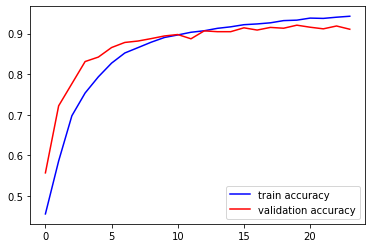

In [23]:
import matplotlib.pyplot as plt
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [24]:
y_pred =   np.argmax(model.predict(X_test_pad), axis  =  1)
y_true = np.argmax(y_test, axis = 1)
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

63/63 [==============================] - 6s 68ms/step
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       705
           1       0.92      0.87      0.89       293
           2       0.72      0.82      0.77       139
           3       0.93      0.96      0.94       566
           4       0.92      0.86      0.89       240
           5       0.67      0.77      0.72        57

    accuracy                           0.91      2000
   macro avg       0.85      0.87      0.86      2000
weighted avg       0.91      0.91      0.91      2000



In [25]:
from keras.models import load_model
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
 # deletes the existing model

# returns am identical compiled model
model5 = load_model('model.h5')


In [26]:
y_pred =   np.argmax(model5.predict(X_test_pad), axis  =  1)
# y_true = np.argmax(y_test, axis = 1)
# from sklearn import metrics
# print(metrics.classification_report(y_pred, y_true))
print(y_pred)

63/63 [==============================] - 6s 67ms/step
[3 3 3 ... 0 0 4]


In [87]:
def text_preprocessing2(text):
    
    text = str(text).lower()
    text =  th.cont_exp(text)
    text= th.remove_emails(text)
    text= th.remove_html_tags(text)
    text = th.remove_special_chars(text)
    text = th.remove_accented_chars(text)
    text = th.make_base(text) #ran -> run,
    return(text)

In [165]:
new_text=text_preprocessing2("i feel it is really valuable to contemplate on that phrase thy will be done in all of our lives")

print(new_text)

I feel it is really valuable to contemplate on that phrase thy will be do in all of our life


In [3]:
# text="i get giddy over feeling elegant in a perfectly fitted pencil skirt"
tokenizer = Tokenizer()
tokendata=tokenizer.fit_on_texts([new_text])
# print(tokenizer)

# newhgsshdc=pad_sequences([[text]],maxlen=300,padding='post')

NameError: name 'Tokenizer' is not defined

In [144]:
X_train_pad=pad_sequences([[text]],maxlen=300,padding='post')

ValueError: invalid literal for int() with base 10: 'i get giddy over feeling elegant in a perfectly fitted pencil skirt'

In [179]:
test_5544 = tokenizer.texts_to_sequences(["i get giddy over feeling elegant in a perfectly fitted pencil skirt"])
# print("\nTest Sequence = ", test_seq)
# padded = pad_sequences(test_seq, maxlen=300)
# X_train_pad222=pad_sequences(test_5544,maxlen=300,padding='post')
print(test_5544)


[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]


In [1]:
tokenizer=Tokenizer(num_words=10000,lower=True)
# df_total = pd.concat([df_cleaned_train['Input'], df_test.Input], axis = 0)
newhbhgc=tokenizer.fit_on_texts(["i get giddy over feeling elegant in a perfectly fitted pencil skirt"])

NameError: name 'Tokenizer' is not defined

In [178]:
y_pred =   np.argmax(model5.predict(newhbhgc), axis  =  1)
print(y_pred)

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [2]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# # from keras.preprocessing.text import Tokenizernum_words# this means 10000 unique words can be taken 
# tokenizer=Tokenizer(num_words=10000,lower=True)
import pickle
with open('token.pkl','rb')as handle:
    token_new=pickle.load(handle)


FileNotFoundError: [Errno 2] No such file or directory: 'token.pkl'

In [3]:
token_new.fit_on_texts([["i got good marks in exam and my parents are proud of me"]])

In [4]:

# print(token_new)
import numpy as  np

from keras_preprocessing.sequence import pad_sequences
new23=token_new.texts_to_sequences(["i get fear watching a horror movie"]) # this converts texts into some numeric sequences 
new234=pad_sequences(new23,maxlen=300,padding='post') 
print(new23)
print(new234)
y_pred =   (model5.predict(new234))
# y_true = np.argmax(y_test, axis = 1)
# from sklearn import metrics
# print(metrics.classification_report(y_pred, y_true))
print(y_pred)

NameError: name 'token_new' is not defined

In [6]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]